In [ ]:
!pip install transformers


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import json
from transformers import pipeline

def analyze_comments_by_cluster(clusters_json_path, comments_json_path):
    sentiment_analysis = pipeline("sentiment-analysis")

    with open(clusters_json_path, 'r') as f:
        clusters = json.load(f)

    with open(comments_json_path, 'r') as f:
        comments_data = json.load(f)

    cluster_sentiment_counts = {"Left": {"POSITIVE": 0, "NEGATIVE": 0},
                                "Neutral": {"POSITIVE": 0, "NEGATIVE": 0},
                                "Right": {"POSITIVE": 0, "NEGATIVE": 0}}

    for cluster_label, video_ids in clusters.items():
        for video_id in video_ids:
            if video_id in comments_data:
                for comment in comments_data[video_id]:
                    result = sentiment_analysis(comment)[0]
                    sentiment_label = result['label']
                    cluster_sentiment_counts[cluster_label][sentiment_label] += 1




    return cluster_sentiment_counts




No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'Left': {'POSITIVE': 396, 'NEGATIVE': 132}, 'Neutral': {'POSITIVE': 342, 'NEGATIVE': 114}, 'Right': {'POSITIVE': 534, 'NEGATIVE': 178}}
{'Left': 528, 'Neutral': 456, 'Right': 712}


In [13]:
#ABC
clusters_json_path = '/content/drive/MyDrive/COMP396/ABC_clusters_video_ids.json'
comments_json_path = '/content/drive/MyDrive/COMP396/updated_ABC_playlist_data.json'
print("ABC News result")
result = analyze_comments_by_cluster(clusters_json_path, comments_json_path)
print(result)

#FOX
clusters_json_path = '/content/drive/MyDrive/COMP396/FOX_clusters_video_ids.json'
comments_json_path = '/content/drive/MyDrive/COMP396/updated_fox_playlist_data.json'
print("FOX News result")
result = analyze_comments_by_cluster(clusters_json_path, comments_json_path)
print(result)

#NBC
clusters_json_path = '/content/drive/MyDrive/COMP396/NBC_clusters_video_ids.json'
comments_json_path = '/content/drive/MyDrive/COMP396/updated_NBC_playlist_data.json'
print("NBC News result")
result = analyze_comments_by_cluster(clusters_json_path, comments_json_path)
print(result)

#CNN
clusters_json_path = '/content/drive/MyDrive/COMP396/CNN_clusters_video_ids.json'
comments_json_path = '/content/drive/MyDrive/COMP396/updated_CNN_playlist_data.json'
print("CNN News result")
result = analyze_comments_by_cluster(clusters_json_path, comments_json_path)
print(result)






No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


ABC News result


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


({'Left': {'POSITIVE': 1086, 'NEGATIVE': 362}, 'Neutral': {'POSITIVE': 1200, 'NEGATIVE': 400}, 'Right': {'POSITIVE': 1068, 'NEGATIVE': 356}}, {'Left': 1448, 'Neutral': 1600, 'Right': 1424})
FOX News result


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


({'Left': {'POSITIVE': 1752, 'NEGATIVE': 584}, 'Neutral': {'POSITIVE': 1896, 'NEGATIVE': 632}, 'Right': {'POSITIVE': 1980, 'NEGATIVE': 660}}, {'Left': 2336, 'Neutral': 2528, 'Right': 2640})
NBC News result


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


({'Left': {'POSITIVE': 696, 'NEGATIVE': 232}, 'Neutral': {'POSITIVE': 1608, 'NEGATIVE': 536}, 'Right': {'POSITIVE': 2010, 'NEGATIVE': 670}}, {'Left': 928, 'Neutral': 2144, 'Right': 2680})
CNN News result
({'Left': {'POSITIVE': 396, 'NEGATIVE': 132}, 'Neutral': {'POSITIVE': 342, 'NEGATIVE': 114}, 'Right': {'POSITIVE': 534, 'NEGATIVE': 178}}, {'Left': 528, 'Neutral': 456, 'Right': 712})


In [2]:
!pip install matplotlib seaborn


In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_video_metrics(clusters_json_path, metrics_json_path, news_channel_name):
    with open(clusters_json_path, 'r') as f:
        clusters = json.load(f)

    with open(metrics_json_path, 'r') as f:
        video_metrics = json.load(f)

    metrics_totals = {cluster: {"ViewCount": 0, "LikeCount": 0, "CommentCount": 0} for cluster in clusters}

    for cluster, video_ids in clusters.items():
        for video_id in video_ids:
            if video_id in video_metrics:
                metrics = video_metrics[video_id]
                metrics_totals[cluster]["ViewCount"] += int(metrics.get("viewCount", 0) or 0)
                metrics_totals[cluster]["LikeCount"] += int(metrics.get("likeCount", 0) or 0)
                metrics_totals[cluster]["CommentCount"] += int(metrics.get("commentCount", 0) or 0)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f'{news_channel_name} News Channel - Engagement Metrics')

    metrics = ["ViewCount", "LikeCount", "CommentCount"]
    for ax, metric in zip(axes, metrics):
        cluster_totals = [metrics_totals[cluster][metric] for cluster in clusters]
        ax.bar(clusters.keys(), cluster_totals)
        ax.set_title(f'Total {metric}')
        ax.set_ylabel(f'Total {metric}')
        ax.set_xlabel('Cluster')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()




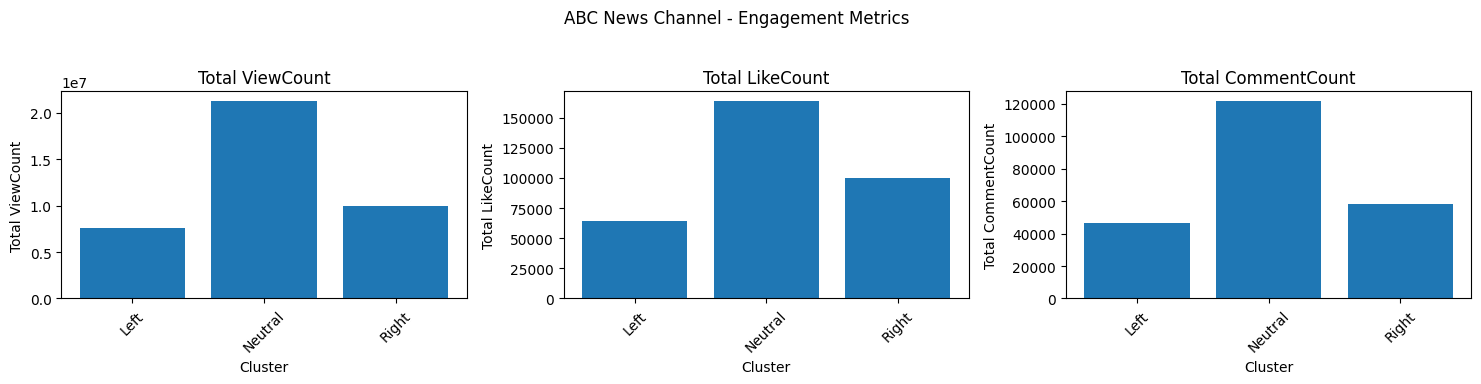

In [16]:
#ABC
news_channel_name = 'ABC'
metrics_json_path = '/content/drive/MyDrive/COMP396/updated_ABC_playlist_data.json'
clusters_json_path = '/content/drive/MyDrive/COMP396/ABC_clusters_video_ids.json'

visualize_video_metrics(clusters_json_path, metrics_json_path, news_channel_name)

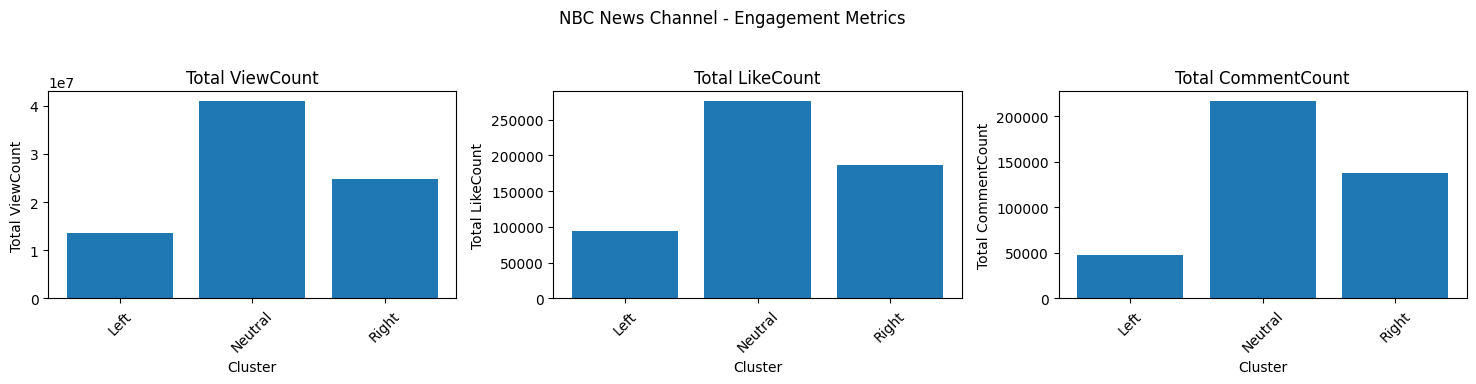

In [17]:
#NBC
news_channel_name = 'NBC'
metrics_json_path = '/content/drive/MyDrive/COMP396/updated_NBC_playlist_data.json'
clusters_json_path = '/content/drive/MyDrive/COMP396/NBC_clusters_video_ids.json'

visualize_video_metrics(clusters_json_path, metrics_json_path, news_channel_name)

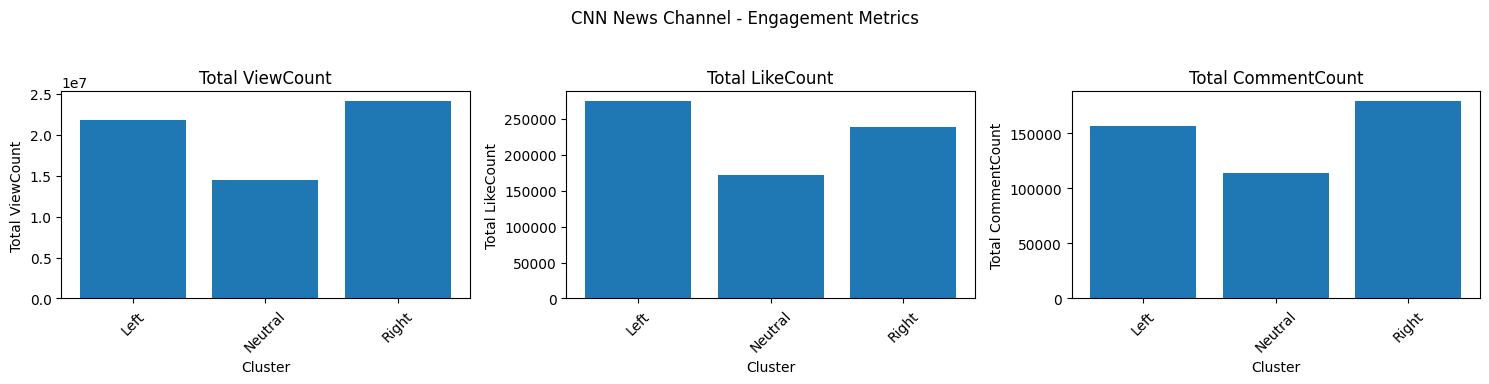

In [18]:
#CNN
news_channel_name = 'CNN'
metrics_json_path = '/content/drive/MyDrive/COMP396/updated_CNN_playlist_data.json'
clusters_json_path = '/content/drive/MyDrive/COMP396/CNN_clusters_video_ids.json'

visualize_video_metrics(clusters_json_path, metrics_json_path, news_channel_name)

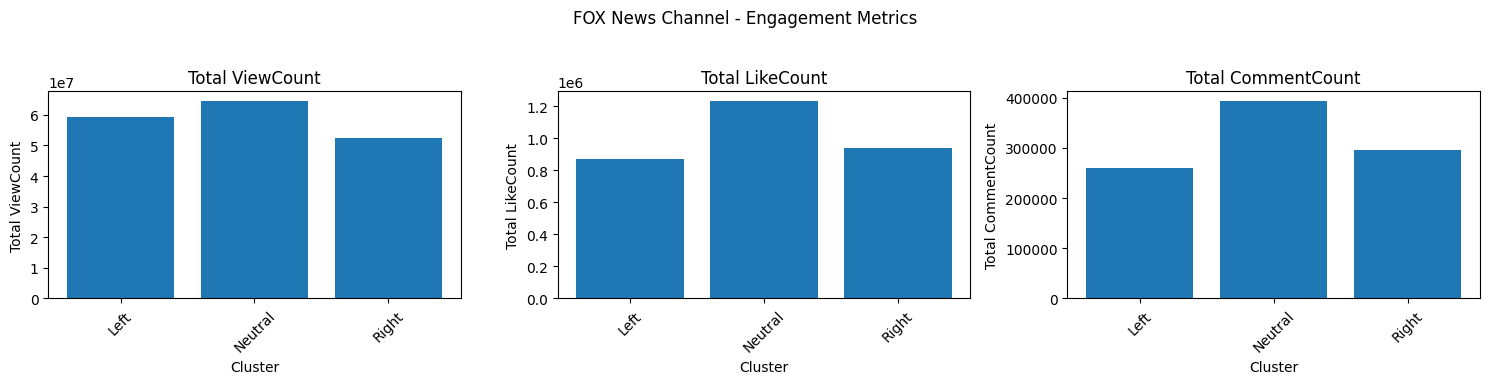

In [19]:
#FOX
news_channel_name = 'FOX'
metrics_json_path = '/content/drive/MyDrive/COMP396/updated_fox_playlist_data.json'
clusters_json_path = '/content/drive/MyDrive/COMP396/FOX_clusters_video_ids.json'

visualize_video_metrics(clusters_json_path, metrics_json_path, news_channel_name)